In [16]:
# imports
from data_creation import create_data
from util import read_data, calculate_n_sets, save_ng_result, save_dng_results, read_ng_data, read_ng_test_data, read_dng_data, read_dng_test_data, calculate_route_costs, group_data_by, calculate_route_costs_dmp
from routing import dynamic_ng_pathing, ng_routing
from computational_experiment import test_delta1_for_ng_routing, test_delta1_and_delta2_for_dng_pathing
from classes import SortOption
from visualize import visualize_route, visualize_nodes
from nearest_neighbor import find_nearest_neighbours_path
from routing_test import ng_routing_test

import matplotlib.pyplot as plt
import shutil
import os
from statistics import mean

In [17]:
path = '/Users/lukas/Documents/Master Thesis/'

In [18]:
# what to do
create_new_data = True
clear_exports = True

conduct_nn_routing = True
conduct_ng_routing = True
conduct_dng_pathing = False
conduct_ng_testing = False
conduct_dng_testing = False

In [19]:
# Data Creation Parameters
amount = 15
range_x = 200
range_y = 200

In [20]:
# Hyper Parameters
starting_node = 0
delta1 = 7
delta2 = 8

In [21]:
# Testing Parameters:
iterations_ng = 20
iterations_dng = 5

In [22]:
if os.path.isdir(path + "export"):
    if clear_exports:
        shutil.rmtree(path + "export")

In [23]:
# Data preparation
if create_new_data:
    create_data(amount, range_x, range_y, path)

costs_list, nodes = read_data(path)
node_objects = calculate_n_sets(costs_list, nodes, delta1)
to_visit = list(range(0, len(nodes)))
to_visit.remove(starting_node)

Data generation done


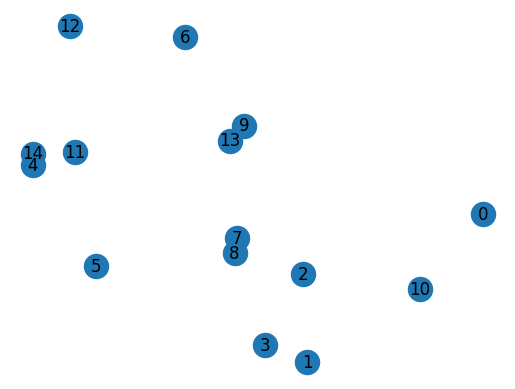

In [24]:
visualize_nodes(nodes)

Nearest Neighbor

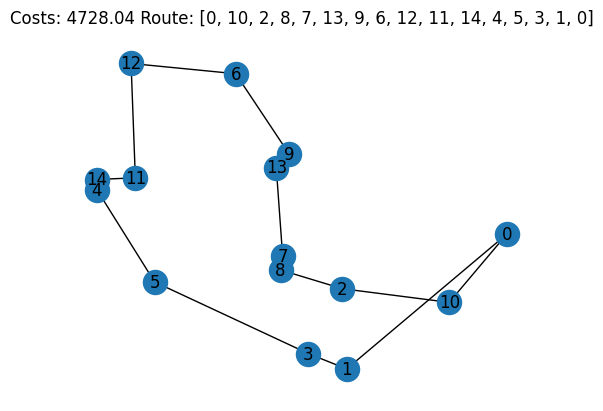

In [25]:
nn_route = find_nearest_neighbours_path(nodes.copy(), costs_list, starting_node)
upper_bound = calculate_route_costs_dmp(nn_route, costs_list)

if conduct_nn_routing:
    visualize_route(nodes, nn_route, calculate_route_costs_dmp(nn_route, costs_list), True, "nn_route", 0, path)

Ng-Routing

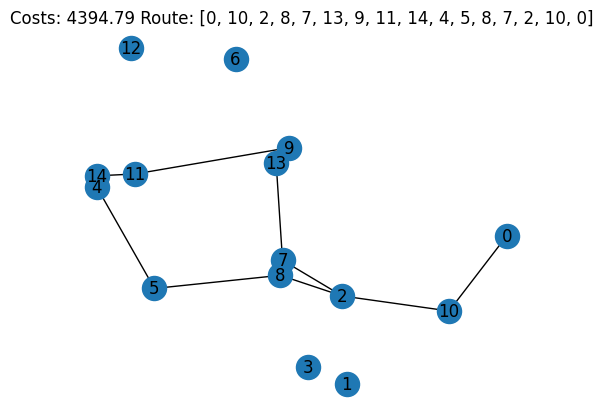

In [26]:
if conduct_ng_routing:
    save_ng_result(path, ng_routing(starting_node, node_objects.copy(), costs_list, upper_bound))
    ng_data = read_ng_data(path)
    visualize_route(nodes, ng_data.best_route, ng_data.cost, True, "ng_route", 0, path)

In [27]:
# if conduct_ng_routing:
#     save_ng_result(path, ng_routing_test(starting_node, node_objects.copy(), costs_list, upper_bound_dmp))
#     ng_data = read_ng_data(path)
#     visualize_route(nodes, ng_data.best_route, ng_data.cost, True, "ng_route", 0, path)

Dynamic Ng-Pathing

In [28]:
if conduct_dng_pathing:
    dng_result, results = dynamic_ng_pathing(starting_node, node_objects.copy(), costs_list, delta2, upper_bound)
    save_dng_results(path, results)
    dng_data = read_dng_data(path)
    for i in range(0, len(dng_data)):
        plt.figure(i)
        visualize_route(nodes, dng_data[i].best_route, dng_data[i].cost, True, "dng_route_iteration", i+1, path)

Ng Testing

In [29]:
if conduct_ng_testing:
    test_delta1_for_ng_routing(path, amount, range_x, range_y, starting_node, iterations_ng)
    ng_test_data = read_ng_test_data(path)

    delta1_array = []
    for i in range(len(ng_test_data[0])):
        delta1_array.append(i+1)

    elementary_delta1 = []
    for result_list in ng_test_data:
        for result in result_list:
            if result.elementary:
                elementary_delta1.append(result.delta1)
                break

    time_difference = []
    for result_list in ng_test_data:
        for i in range(0, len(result_list)-1):
            time_difference.append(result_list[i].time - result_list[i+1].time)

    time_per_delta1 = []
    cost_per_delta1 = []

    for i in ng_test_data[0]:
        time_per_delta1.append([])
        cost_per_delta1.append([])

    for i in range(len(ng_test_data)):
        for j in range(len(ng_test_data[i])):
            time_per_delta1[j].append(ng_test_data[i][j].time)
            cost_per_delta1[j].append(ng_test_data[i][j].cost)

    mean_time_per_delta1 = []
    for array in time_per_delta1:
        mean_time_per_delta1.append(mean(array))

    mean_cost_per_delta1 = []
    for array in cost_per_delta1:
        mean_cost_per_delta1.append(mean(array))

    print()
    print("Data of " + str(len(ng_test_data)) + " iterations")

    print()
    print("Finding Mean Delta1 for permitted solutions")
    print(round(mean(elementary_delta1), 3))
    print()

    print("Finding mean decrease in time for increase in delta1")
    print(round(mean(time_difference), 3))
    print()

    # TODO plot mean_time_per_delta1 and mean_cardinality_per_delta1
    plt.figure(1)
    plt.title("Time Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_time_per_delta1)
    plt.ylabel('Time in seconds')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(4)
    plt.title("Cost Increase for Increase of Delta1")
    plt.plot(delta1_array, mean_cost_per_delta1)
    plt.ylabel('Cost of solution')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

Dng Testing

In [30]:
if conduct_dng_testing:
    test_delta1_and_delta2_for_dng_pathing(path, amount, range_x, range_y, starting_node, iterations_dng)
    dng_test_data = read_dng_test_data(path)

    all_test_data = []
    for document in dng_test_data:
        all_test_data.extend(document)

    sorted_delta2 = group_data_by(all_test_data, SortOption.delta2)
    elementary, not_elementary = group_data_by(all_test_data, SortOption.elementary)
    sorted_start_delta1 = group_data_by(all_test_data, SortOption.start_delta1)
    sorted_final_delta1 = group_data_by(all_test_data, SortOption.final_delta1)
    exceeded, not_exceeded = group_data_by(all_test_data, SortOption.exceeded)

    delta2_array = []
    for i in range(len(sorted_delta2)):
        delta2_array.append(i+1)

    mean_time_per_delta2 = []
    mean_final_delta1_per_delta2 = []
    for delta2_list in sorted_delta2:
        time = []
        final_delta1 = []
        for item in delta2_list:
            time.append(item.time)
            final_delta1.append(item.final_delta1)
        mean_time_per_delta2.append(round(mean(time)))
        mean_final_delta1_per_delta2.append(round(mean(final_delta1), 3))

    all_final_delta1 = []
    for item in elementary:
        all_final_delta1.append(item.final_delta1)
    mean_final_delta1 = round(mean(all_final_delta1), 3)

    success_percent_per_delta2 = []
    for delta2_list in sorted_delta2:
        suc = 0
        for item in delta2_list:
            if item.elementary:
                suc += 1
        percent = suc / len(delta2_list)
        success_percent_per_delta2.append(percent)

    plt.figure(5)
    plt.title("Final Delta1 to Delta2")
    plt.plot(delta2_array, delta2_array)
    plt.plot(delta2_array, mean_final_delta1_per_delta2)
    plt.ylabel('final delta1')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "Final_Delta1" + "" + ".png", format="PNG")
    plt.show()

    plt.figure(4)
    plt.title("Successful Dng Routings")
    plt.plot(delta2_array, success_percent_per_delta2)
    plt.ylabel('success in percent')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "Successful" + "" + ".png", format="PNG")
    plt.show()

    plt.figure(2)
    plt.title("Mean Time Consumption per Delta2")
    plt.plot(delta2_array, mean_time_per_delta2)
    plt.ylabel('mean time')
    plt.xlabel('delta2')
    plt.savefig(path + "export/" + "Time" + "" + ".png", format="PNG")
    plt.show()